In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import statsmodels as sm
from factor_analyzer import FactorAnalyzer 
import sum_backend as sim
import math

Generate Sample

In [2]:
male_sample: list[sim.Subject] = []
female_sample: list[sim.Subject] = []

for i in range(500000):
    male_sample.append(sim.Masc())
    female_sample.append(sim.Fem())

sample = male_sample + female_sample

View Sample DataFrame

In [3]:
sample_df = pd.DataFrame.from_records([subjects.to_dict() for subjects in sample])
sample_df

,natal sex,trans,orientation,orientation label,cross-schematic,latent_differentiation,agp,aap,etii,f1,f2,f3,f4,f5,f6,f7,f8
0,Male,False,3.159584,Straight Male,False,3.934114,4.128466,0.000000,False,1.253612,2.912123,0.917014,0.608914,0.857266,-0.659141,2.629349,-0.025533
1,Male,False,3.301301,Straight Male,False,5.870701,2.578867,0.000000,False,0.685814,0.775692,1.390563,0.304575,0.805966,-0.008489,2.005761,-1.200985
2,Male,False,1.598600,Straight Male,False,2.316813,3.155990,0.000000,False,0.759986,1.227312,0.292935,1.468078,0.847465,-0.092051,-0.005234,-1.088383
3,Male,False,5.260598,Straight Male,False,7.522631,1.131042,0.000000,False,0.781663,3.339083,0.173658,0.632274,1.264307,2.444529,0.542468,2.022665
4,Male,False,1.312940,Straight Male,False,3.980443,0.494817,0.000000,False,1.000487,-0.068214,0.726015,0.442497,1.405805,-1.036968,0.876894,2.665974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Female,True,1.520301,Gay Female,True,1.172782,1.185567,0.000000,False,-0.364106,0.350370,0.229249,0.791561,0.347975,-0.709264,0.354680,0.759146
999996,Female,False,-1.118579,Straight Female,False,-1.060723,3.179343,3.439840,False,-0.828019,-1.498493,1.517620,1.545109,-0.136488,-1.247835,0.828320,0.522453
999997,Female,False,-1.959985,Straight Female,False,-3.216259,0.000000,1.455094,False,-0.130174,-0.990681,-0.506821,-1.061359,1.503106,0.604301,-1.901752,2.247668
999998,Female,False,-2.838861,Straight Female,False,-3.146412,0.000000,1.555441,False,-0.116098,0.190088,0.206567,0.065099,-0.865872,-0.798582,1.702697,1.043074


Display proportions of sexual orientations in simulated dataset

In [4]:
p_trans = len(sample_df[sample_df['cross-schematic'] == True]) / len(sample_df)
p_gay = len(sample_df[sample_df['orientation label'] == 'Gay Male']) / len(sample_df[sample_df['natal sex'] == 'Male'])
p_lesbian = len(sample_df[sample_df['orientation label'] == 'Gay Female']) / len(sample_df[sample_df['natal sex'] == 'Female'])
p_bigirl = len(sample_df[sample_df['orientation label'] == 'Bi Female']) / len(sample_df[sample_df['natal sex'] == 'Female'])

print(f'percent of ppl trans: {p_trans*100}%')
print(f'percent of men gay: {p_gay*100}%')
print(f'percent women lesbian: {p_lesbian*100}%')
print(f'percent women Bi: {p_bigirl*100}%')

percent of ppl trans: 1.1242%
percent of men gay: 2.0452000000000004%
percent women lesbian: 2.0268%
percent women Bi: 12.110999999999999%


Cohen's D Effect Size function

In [10]:
def cohen(sample_1, sample_2):
    term_1 = sample_1.mean() - sample_2.mean()
    term_2 = math.sqrt((sample_1.std() ** 2) + (sample_2.std() ** 2) / 2)
    return abs(term_1 / term_2)

0.882691933972219


<Axes: xlabel='f2', ylabel='Count'>

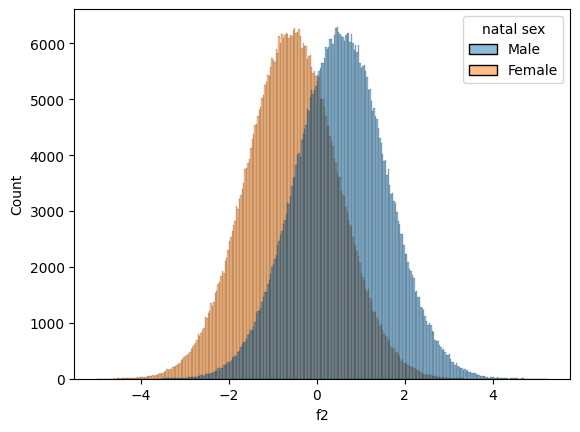

In [6]:
#data = sample_df[sample_df['trans'] == True][sample_df['natal sex'] == 'Male']
d = cohen(sample_df[sample_df['natal sex'] == 'Male']['f2'], sample_df[sample_df['natal sex'] == 'Female']['f2'])
print(d)
sns.histplot(sample_df, x='f2', hue='natal sex')

<Axes: xlabel='f2', ylabel='Count'>

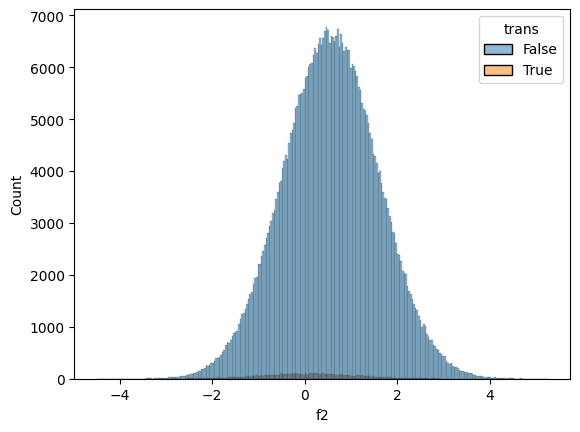

In [7]:
natal_males = sample_df[sample_df['natal sex'] == 'Male']
sns.histplot(natal_males, x='f2', hue='trans')

(np.float64(0.3746764170607533), np.float64(0.14615622694796784))

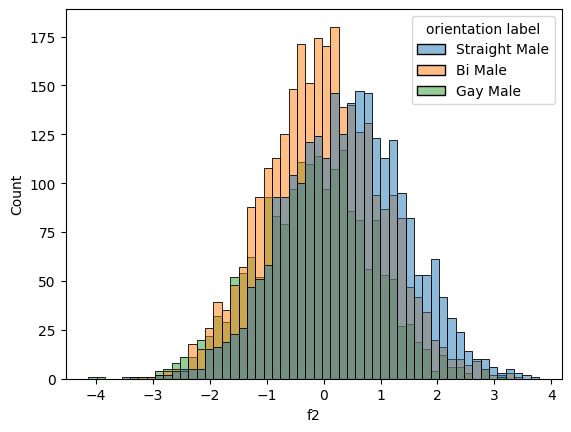

In [12]:
sns.histplot(natal_males[natal_males['trans'] == True], x='f2', hue='orientation label')

d1 = cohen(natal_males[natal_males['trans'] == True].f2, natal_males[natal_males['trans'] == False].f2)
d2 = cohen(natal_males[(natal_males['trans'] == True) & (natal_males['orientation label'] == 'Straight Male')].f2, natal_males[natal_males['trans'] == False].f2)
d1, d2